In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy.optimize import fsolve

**Ozon** — одна из крупнейших и наиболее известных российских компаний в сфере электронной коммерции. Основанная в 1998 году, компания стала пионером интернет-торговли в России и получила неофициальное название "русский Amazon". Сегодня Ozon предлагает разнообразный ассортимент товаров и услуг, включая электронику, одежду, продукты питания, товары для дома, книги и многое другое.

---

### Ключевая информация о компании:

1. **Дата основания:** 1998 год.  
2. **Штаб-квартира:** Москва, Россия.  
3. **Основной вид деятельности:** Электронная коммерция (e-commerce).  
4. **Биржевая информация:**  
   - С 2020 года акции компании торгуются на NASDAQ под тикером **OZON**.
   - Также представлены на Московской бирже (MOEX).  
5. **Платформа Ozon:**  
   - Является маркетплейсом, где свои товары продают как компания, так и сторонние продавцы.
   - Включает в себя B2C, B2B и C2C направления.  

---

### Деятельность:
Ozon работает по модели маркетплейса, предоставляя сторонним продавцам доступ к широкой аудитории. Компания также развивает инфраструктуру логистики и финансовых технологий, включая:  
- **Логистику:**  
  - Собственная сеть складов, пунктов выдачи заказов и партнёрских точек.  
  - Экспресс-доставка в крупные города России.  
- **Финансовые сервисы:**  
  - Финтех-направление, включая Ozon Fintech, которое предлагает кредитные продукты для покупателей и продавцов.  
- **Технологии:**  
  - Инвестиции в автоматизацию, аналитические инструменты и IT-инфраструктуру.  

---

### Основные показатели:  
- **GMV (объем продаж):** Один из ключевых показателей, отражающий рост популярности платформы.  
- **Количество активных покупателей:** Сотни миллионов заказов в год от миллионов пользователей.  
- **Ассортимент:** Более 90 миллионов товаров в разных категориях.  

---

### Стратегия и инновации:
- **Ускоренный рост маркетплейса.**  
- **Развитие Ozon Express** (доставка продуктов питания и товаров за 2 часа).  
- **Поддержка малого и среднего бизнеса:** Программы для продавцов, включая льготные условия размещения.  
- **Экологические инициативы:** Развитие упаковки из перерабатываемых материалов и снижение углеродного следа.

---

### Конкуренты:
Основные конкуренты Ozon в России:  
- Wildberries  
- Яндекс Маркет  
- AliExpress Russia  

---

### Значение компании:
Ozon является лидером цифровой трансформации в ритейле России, предлагая клиентам удобство, широкий выбор и качественный сервис. Благодаря активному росту и внедрению новых технологий, компания удерживает позиции одного из крупнейших игроков на рынке e-commerce в России и СНГ.

In [347]:
def checker(date):
    if date.month in [1, 12]:
        return True
    return False

def get_year(date):
    return date.year

In [348]:
def to_float(x):
    x = float(x.replace('.','').replace(',', '.'))
    return x

def to_value(x):
    x = float(x[:-1].replace('.','').replace(',', '.'))*1000
    return x

def to_perc(x):
    return float(x[:-1].replace('.','').replace(',', '.'))/100

In [349]:
data = pd.read_csv('Прошлые данные - OZONDR.csv', parse_dates=['Дата'])
data = data.sort_values(['Дата'])
data.head()

C:\Users\ivant\AppData\Local\Temp\ipykernel_36628\2326960232.py:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv('Прошлые данные - OZONDR.csv', parse_dates=['Дата'])


,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
988,2020-11-25,"2.954,00","3.102,00","3.282,00","2.888,00","1,29M","-2,60%"
987,2020-11-26,"2.944,00","3.002,00","3.002,00","2.900,50","194,32K","-0,34%"
986,2020-11-27,"3.025,00","2.967,50","3.082,00","2.913,00","336,31K","2,75%"
985,2020-11-30,"3.071,00","2.999,50","3.140,00","2.967,50","210,26K","1,52%"
984,2020-12-01,"3.059,50","3.048,00","3.097,00","3.000,50","150,54K","-0,37%"


In [350]:
data['Цена'] = data['Цена'].apply(to_float)
data['Откр.'] = data['Откр.'].apply(to_float)
data['Макс.'] = data['Макс.'].apply(to_float)
data['Мин.'] = data['Мин.'].apply(to_float)
# data['Объём'] = data['Объём'].apply(to_value)
data['Изм. %'] = data['Изм. %'].apply(to_perc)

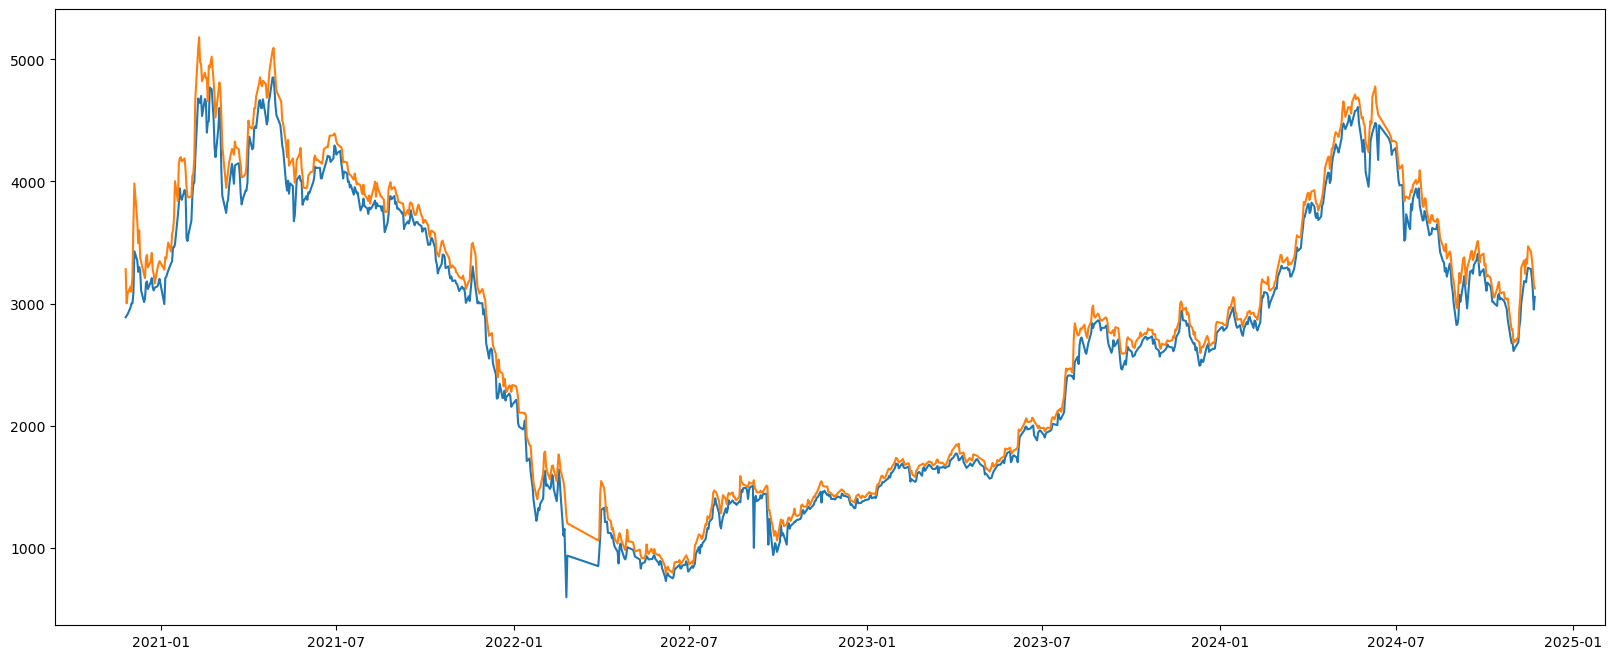

In [351]:
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(data['Дата'], data['Мин.'])
ax.plot(data['Дата'], data['Макс.'], alpha=1)

# ax.plot(data['Дата'], data['Изм. %'])

plt.show()

In [352]:
data1 = data[data['Дата'].apply(checker)]
data1.loc[:, 'Year'] = data1.loc[:, 'Дата'].apply(get_year)
data1 

C:\Users\ivant\AppData\Local\Temp\ipykernel_36628\909759873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.loc[:, 'Year'] = data1.loc[:, 'Дата'].apply(get_year)


,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Year
984,2020-12-01,3059.5,3048.0,3097.0,3000.5,"150,54K",-0.0037,2020
983,2020-12-02,3184.0,3030.0,3230.0,3003.0,"264,44K",0.0407,2020
982,2020-12-03,3614.5,3120.5,3649.0,3085.5,"914,18K",0.1352,2020
981,2020-12-04,3556.0,3566.5,3984.0,3428.5,"1,10M",-0.0162,2020
980,2020-12-07,3422.0,3570.0,3675.0,3351.5,"404,94K",-0.0377,2020
...,...,...,...,...,...,...,...,...
206,2024-01-25,2785.0,2794.0,2809.0,2736.0,"340,74K",-0.0030,2024
205,2024-01-26,2836.0,2807.5,2859.0,2791.5,"505,07K",0.0183,2024
204,2024-01-29,2886.0,2849.5,2896.5,2849.0,"354,51K",0.0176,2024
203,2024-01-30,2911.5,2879.5,2930.0,2831.0,"657,50K",0.0088,2024


In [353]:
mn = data1.loc[data1.groupby('Year')['Дата'].idxmin()][['Дата', 'Цена']].sort_values(['Дата'], ascending=False)
mx = data1.loc[data1.groupby('Year')['Дата'].idxmax()][['Дата', 'Цена']].sort_values(['Дата'], ascending=False)

mn.loc[:, 'Year'] = mn.loc[:, 'Дата'].apply(get_year)
mx.loc[:, 'Year'] = mx.loc[:, 'Дата'].apply(get_year)

mn = mn[['Цена','Year']]
mx = mx[['Цена','Year']]

m = pd.merge(mn,mx,on='Year')

m1 = m[['Цена_x','Цена_y']]
m1['Year'] = m['Year']
m1.columns = ['Цена акций начало года', 'Цена акций конец года','Год']
m1 = m1.set_index('Год')
m1 = m1.drop(2024, axis=0)
m1

,Цена акций начало года,Цена акций конец года
Год,,
2023,1438.0,2804.5
2022,2238.5,1402.0
2021,3229.5,2316.5
2020,3059.5,3289.5


In [354]:
databook = pd.read_excel('Ozon_Databook_Q3_24.xlsx', 'Public Databook', header = 4)
databook = databook.drop([i for i in databook.columns if 'Q' in i or '2018' in i or '2019' in i]+['Unnamed: 23'],axis=1)
databook.columns = ['Год']+[i[3:] for i in databook.columns[1:]]

databook = databook.drop(list(range(0,4))+list(range(9,12))+list(range(15,18))+[21,28,29,30]+list(range(36,54)),axis = 0)
display(databook['Год'].unique())

array(['GMV incl. services ',
       'Share of Marketplace, as % of GMV incl. services ',
       'Number of orders, millions', 'Number of active buyers, millions',
       'Frequency, orders', 'Total revenue ',
       '(Loss)/profit for the period', 'Adjusted EBITDA',
       'Total non-current assets', 'Total current assets',
       'Cash and cash equivalents', 'Total assets ', 'Total equity  ',
       'Total non-current liabilities ', 'Total current liabilities ',
       'Total liabilities ', 'Total equity and liabilities ',
       'Movements in working capital1',
       'Net cash (used in) / generated from operating activities1',
       'Capital expenditures',
       'Net cash (used in)/ generated from investing activities',
       'Net cash(used in)/ generated from financing activities2'],
      dtype=object)

In [355]:
databook = databook.set_index('Год')
databook = databook.T.iloc[::-1]
databook['T'] = [0.2]*databook.shape[0]

shares_q = [216.414000,203.730000,203.730000,203.730000]
databook['Shares quantity'] = shares_q

databook

Год,GMV incl. services,"Share of Marketplace, as % of GMV incl. services","Number of orders, millions","Number of active buyers, millions","Frequency, orders",Total revenue,(Loss)/profit for the period,Adjusted EBITDA,Total non-current assets,Total current assets,...,Total current liabilities,Total liabilities,Total equity and liabilities,Movements in working capital1,Net cash (used in) / generated from operating activities1,Capital expenditures,Net cash (used in)/ generated from investing activities,Net cash(used in)/ generated from financing activities2,T,Shares quantity
2023,1.752277e+06,0.831301,965.667008,46.089422,20.952031,424291.0,-42665.0,4208.0,199118.0,276908.0,...,341885.0,542603.0,476026.0,108697.0,83598.0,-29672.0,-27326.0,18565.0,0.2,216.414
2022,8.322403e+05,0.761522,465.387838,35.169559,13.232314,277115.0,-58187.0,-3215.0,129918.0,154903.0,...,194874.0,301468.0,284821.0,1247.0,-18753.0,-35813.0,-16040.0,18394.0,0.2,203.730
2021,4.482600e+05,0.647765,223.300000,25.600000,8.722656,178215.0,-56779.0,-41156.0,74752.0,166586.0,...,123936.0,210730.0,241338.0,32183.0,-13626.0,-19341.0,-35403.0,53892.0,0.2,203.730
2020,1.974139e+05,0.478128,73.872868,13.760362,5.368526,104350.0,-22264.0,-11716.0,29800.0,124808.0,...,60211.0,75351.0,154608.0,20119.0,6570.0,-6840.0,-6580.0,102567.0,0.2,203.730


# соединим таблички

In [356]:
databook.index=databook.index.astype('int64')


m1 = m1.reset_index()
databook = databook.reset_index()

databook = pd.merge(databook,m1,'inner',left_on='index', right_on='Год')

databook = databook.drop('index',axis=1).set_index('Год')

### 1. **CCF (Cash Conversion Flow)**:
   - **Описание:** Поток денежных средств, обычно рассчитываемый как чистый денежный поток от операционной деятельности за вычетом капитальных затрат (CapEx).
   - **Формула:**  
     $$
     \text{CCF} = \text{Net Cash from Operating Activities} - \text{Capital Expenditures}
     $$
     Или же
     $$
     \text{CCF} = \text{Shares quantity} \cdot \frac{\text{Цена акций конец года} + \text{Цена акций начало года}}{2} \cdot \frac{1}{(1+k_e)^n}
     $$
   - **Данные:**  
     - "Net cash (used in)/generated from operating activities"
     - "Capital expenditures"

---

In [357]:
databook['CCF 2'] = databook['Net cash (used in) / generated from operating activities1'] - databook['Capital expenditures']
databook

,GMV incl. services,"Share of Marketplace, as % of GMV incl. services","Number of orders, millions","Number of active buyers, millions","Frequency, orders",Total revenue,(Loss)/profit for the period,Adjusted EBITDA,Total non-current assets,Total current assets,...,Movements in working capital1,Net cash (used in) / generated from operating activities1,Capital expenditures,Net cash (used in)/ generated from investing activities,Net cash(used in)/ generated from financing activities2,T,Shares quantity,Цена акций начало года,Цена акций конец года,CCF 2
Год,,,,,,,,,,,,,,,,,,,,,
2023,1.752277e+06,0.831301,965.667008,46.089422,20.952031,424291.0,-42665.0,4208.0,199118.0,276908.0,...,108697.0,83598.0,-29672.0,-27326.0,18565.0,0.2,216.414,1438.0,2804.5,113270.0
2022,8.322403e+05,0.761522,465.387838,35.169559,13.232314,277115.0,-58187.0,-3215.0,129918.0,154903.0,...,1247.0,-18753.0,-35813.0,-16040.0,18394.0,0.2,203.730,2238.5,1402.0,17060.0
2021,4.482600e+05,0.647765,223.300000,25.600000,8.722656,178215.0,-56779.0,-41156.0,74752.0,166586.0,...,32183.0,-13626.0,-19341.0,-35403.0,53892.0,0.2,203.730,3229.5,2316.5,5715.0
2020,1.974139e+05,0.478128,73.872868,13.760362,5.368526,104350.0,-22264.0,-11716.0,29800.0,124808.0,...,20119.0,6570.0,-6840.0,-6580.0,102567.0,0.2,203.730,3059.5,3289.5,13410.0


### 2. **$\mu$ (Рентабельность, доходность)**:
   - **Описание:** Му может относиться к рентабельности продаж или маржинальной прибыли.
   - **Формула для маржи EBITDA:**  
     $$
     \mu = \frac{\text{Adjusted EBITDA}}{\text{Total Revenue}}
     $$
   - **Данные:**  
     - "Adjusted EBITDA"
     - "Total revenue"

---

In [358]:
databook['mu'] = databook['Adjusted EBITDA'] / databook['Total revenue ']
databook

,GMV incl. services,"Share of Marketplace, as % of GMV incl. services","Number of orders, millions","Number of active buyers, millions","Frequency, orders",Total revenue,(Loss)/profit for the period,Adjusted EBITDA,Total non-current assets,Total current assets,...,Net cash (used in) / generated from operating activities1,Capital expenditures,Net cash (used in)/ generated from investing activities,Net cash(used in)/ generated from financing activities2,T,Shares quantity,Цена акций начало года,Цена акций конец года,CCF 2,mu
Год,,,,,,,,,,,,,,,,,,,,,
2023,1.752277e+06,0.831301,965.667008,46.089422,20.952031,424291.0,-42665.0,4208.0,199118.0,276908.0,...,83598.0,-29672.0,-27326.0,18565.0,0.2,216.414,1438.0,2804.5,113270.0,0.009918
2022,8.322403e+05,0.761522,465.387838,35.169559,13.232314,277115.0,-58187.0,-3215.0,129918.0,154903.0,...,-18753.0,-35813.0,-16040.0,18394.0,0.2,203.730,2238.5,1402.0,17060.0,-0.011602
2021,4.482600e+05,0.647765,223.300000,25.600000,8.722656,178215.0,-56779.0,-41156.0,74752.0,166586.0,...,-13626.0,-19341.0,-35403.0,53892.0,0.2,203.730,3229.5,2316.5,5715.0,-0.230935
2020,1.974139e+05,0.478128,73.872868,13.760362,5.368526,104350.0,-22264.0,-11716.0,29800.0,124808.0,...,6570.0,-6840.0,-6580.0,102567.0,0.2,203.730,3059.5,3289.5,13410.0,-0.112276


### 3. **t (Ставка налогообложения)**:
   - **Описание:** Средняя ставка налога, уплаченная компанией.
   - **Формула:**  
     $$
     t = \frac{\text{Income Tax Expense}}{\text{Profit Before Tax}}
     $$
   - **Данные:** Если эти строки отсутствуют, можно использовать стандартную ставку налога (например, для РФ — 20%).

---

### 4. **kd (Стоимость долга)**:
   - **Описание:** Средневзвешенная стоимость долгового капитала.
   - **Формула:**  
     $$
     k_d = \frac{\text{Interest Expense}}{\text{Total Debt}}
     $$
   - **Данные:**  
     - "Interest expense" можно найти в "PnL" или "Total liabilities".
     - "Total debt" = "Total non-current liabilities" + "Total current liabilities".

---

In [359]:
databook['k_d'] = databook['Net cash(used in)/ generated from financing activities2']/databook['Total liabilities ']
databook

,GMV incl. services,"Share of Marketplace, as % of GMV incl. services","Number of orders, millions","Number of active buyers, millions","Frequency, orders",Total revenue,(Loss)/profit for the period,Adjusted EBITDA,Total non-current assets,Total current assets,...,Capital expenditures,Net cash (used in)/ generated from investing activities,Net cash(used in)/ generated from financing activities2,T,Shares quantity,Цена акций начало года,Цена акций конец года,CCF 2,mu,k_d
Год,,,,,,,,,,,,,,,,,,,,,
2023,1.752277e+06,0.831301,965.667008,46.089422,20.952031,424291.0,-42665.0,4208.0,199118.0,276908.0,...,-29672.0,-27326.0,18565.0,0.2,216.414,1438.0,2804.5,113270.0,0.009918,0.034215
2022,8.322403e+05,0.761522,465.387838,35.169559,13.232314,277115.0,-58187.0,-3215.0,129918.0,154903.0,...,-35813.0,-16040.0,18394.0,0.2,203.730,2238.5,1402.0,17060.0,-0.011602,0.061015
2021,4.482600e+05,0.647765,223.300000,25.600000,8.722656,178215.0,-56779.0,-41156.0,74752.0,166586.0,...,-19341.0,-35403.0,53892.0,0.2,203.730,3229.5,2316.5,5715.0,-0.230935,0.255740
2020,1.974139e+05,0.478128,73.872868,13.760362,5.368526,104350.0,-22264.0,-11716.0,29800.0,124808.0,...,-6840.0,-6580.0,102567.0,0.2,203.730,3059.5,3289.5,13410.0,-0.112276,1.361190


### 5. **D (Долг)**:
   - **Описание:** Общий долг компании.
   - **Формула:**  
     $$
     D = \text{Total non-current liabilities} + \text{Total current liabilities}
     $$
   - **Данные:**  
     - "Total non-current liabilities"
     - "Total current liabilities"

---

In [360]:
databook['D'] = databook['Total liabilities ']
databook

,GMV incl. services,"Share of Marketplace, as % of GMV incl. services","Number of orders, millions","Number of active buyers, millions","Frequency, orders",Total revenue,(Loss)/profit for the period,Adjusted EBITDA,Total non-current assets,Total current assets,...,Net cash (used in)/ generated from investing activities,Net cash(used in)/ generated from financing activities2,T,Shares quantity,Цена акций начало года,Цена акций конец года,CCF 2,mu,k_d,D
Год,,,,,,,,,,,,,,,,,,,,,
2023,1.752277e+06,0.831301,965.667008,46.089422,20.952031,424291.0,-42665.0,4208.0,199118.0,276908.0,...,-27326.0,18565.0,0.2,216.414,1438.0,2804.5,113270.0,0.009918,0.034215,542603.0
2022,8.322403e+05,0.761522,465.387838,35.169559,13.232314,277115.0,-58187.0,-3215.0,129918.0,154903.0,...,-16040.0,18394.0,0.2,203.730,2238.5,1402.0,17060.0,-0.011602,0.061015,301468.0
2021,4.482600e+05,0.647765,223.300000,25.600000,8.722656,178215.0,-56779.0,-41156.0,74752.0,166586.0,...,-35403.0,53892.0,0.2,203.730,3229.5,2316.5,5715.0,-0.230935,0.255740,210730.0
2020,1.974139e+05,0.478128,73.872868,13.760362,5.368526,104350.0,-22264.0,-11716.0,29800.0,124808.0,...,-6580.0,102567.0,0.2,203.730,3059.5,3289.5,13410.0,-0.112276,1.361190,75351.0


### 6. **S (Акционерный капитал)**:
   - **Описание:** Рыночная стоимость капитала (стоимость акций).
   - **Формула:**  
     $$
     S = \text{Shares Outstanding} \times \text{Share Price}
     $$
     - Если количество акций неизвестно, используйте данные "Total equity" для оценки.
   - **Данные:**  
     - "Цена акций начало года" и "Цена акций конец года"
     - "Total equity"

---

In [361]:
databook['S'] = databook['Shares quantity']*(databook['Цена акций начало года']+databook['Цена акций конец года'])/2
databook

,GMV incl. services,"Share of Marketplace, as % of GMV incl. services","Number of orders, millions","Number of active buyers, millions","Frequency, orders",Total revenue,(Loss)/profit for the period,Adjusted EBITDA,Total non-current assets,Total current assets,...,Net cash(used in)/ generated from financing activities2,T,Shares quantity,Цена акций начало года,Цена акций конец года,CCF 2,mu,k_d,D,S
Год,,,,,,,,,,,,,,,,,,,,,
2023,1.752277e+06,0.831301,965.667008,46.089422,20.952031,424291.0,-42665.0,4208.0,199118.0,276908.0,...,18565.0,0.2,216.414,1438.0,2804.5,113270.0,0.009918,0.034215,542603.0,459068.1975
2022,8.322403e+05,0.761522,465.387838,35.169559,13.232314,277115.0,-58187.0,-3215.0,129918.0,154903.0,...,18394.0,0.2,203.730,2238.5,1402.0,17060.0,-0.011602,0.061015,301468.0,370839.5325
2021,4.482600e+05,0.647765,223.300000,25.600000,8.722656,178215.0,-56779.0,-41156.0,74752.0,166586.0,...,53892.0,0.2,203.730,3229.5,2316.5,5715.0,-0.230935,0.255740,210730.0,564943.2900
2020,1.974139e+05,0.478128,73.872868,13.760362,5.368526,104350.0,-22264.0,-11716.0,29800.0,124808.0,...,102567.0,0.2,203.730,3059.5,3289.5,13410.0,-0.112276,1.361190,75351.0,646740.8850


### 7. **L** :
   - **Описание:** Текущая ливириджность компании.
   - **Формула:**  
     $$
     L = \frac{\text{D}}{\text{S}}
     $$


---

In [362]:
databook['L'] = databook['D']/databook['S']
databook

,GMV incl. services,"Share of Marketplace, as % of GMV incl. services","Number of orders, millions","Number of active buyers, millions","Frequency, orders",Total revenue,(Loss)/profit for the period,Adjusted EBITDA,Total non-current assets,Total current assets,...,T,Shares quantity,Цена акций начало года,Цена акций конец года,CCF 2,mu,k_d,D,S,L
Год,,,,,,,,,,,,,,,,,,,,,
2023,1.752277e+06,0.831301,965.667008,46.089422,20.952031,424291.0,-42665.0,4208.0,199118.0,276908.0,...,0.2,216.414,1438.0,2804.5,113270.0,0.009918,0.034215,542603.0,459068.1975,1.181966
2022,8.322403e+05,0.761522,465.387838,35.169559,13.232314,277115.0,-58187.0,-3215.0,129918.0,154903.0,...,0.2,203.730,2238.5,1402.0,17060.0,-0.011602,0.061015,301468.0,370839.5325,0.812934
2021,4.482600e+05,0.647765,223.300000,25.600000,8.722656,178215.0,-56779.0,-41156.0,74752.0,166586.0,...,0.2,203.730,3229.5,2316.5,5715.0,-0.230935,0.255740,210730.0,564943.2900,0.373011
2020,1.974139e+05,0.478128,73.872868,13.760362,5.368526,104350.0,-22264.0,-11716.0,29800.0,124808.0,...,0.2,203.730,3059.5,3289.5,13410.0,-0.112276,1.361190,75351.0,646740.8850,0.116509


### 8. **$k_e$**:
   - **Формула:**  
     $$
     k_e = \frac{\text{Цена в конце} - \text{Цена в начале}}{\text{Цена в начале}}
     $$


---

In [363]:
databook['k_e'] = (databook['Цена акций конец года'] - databook['Цена акций начало года'])/databook['Цена акций начало года']
databook

,GMV incl. services,"Share of Marketplace, as % of GMV incl. services","Number of orders, millions","Number of active buyers, millions","Frequency, orders",Total revenue,(Loss)/profit for the period,Adjusted EBITDA,Total non-current assets,Total current assets,...,Shares quantity,Цена акций начало года,Цена акций конец года,CCF 2,mu,k_d,D,S,L,k_e
Год,,,,,,,,,,,,,,,,,,,,,
2023,1.752277e+06,0.831301,965.667008,46.089422,20.952031,424291.0,-42665.0,4208.0,199118.0,276908.0,...,216.414,1438.0,2804.5,113270.0,0.009918,0.034215,542603.0,459068.1975,1.181966,0.950278
2022,8.322403e+05,0.761522,465.387838,35.169559,13.232314,277115.0,-58187.0,-3215.0,129918.0,154903.0,...,203.730,2238.5,1402.0,17060.0,-0.011602,0.061015,301468.0,370839.5325,0.812934,-0.373688
2021,4.482600e+05,0.647765,223.300000,25.600000,8.722656,178215.0,-56779.0,-41156.0,74752.0,166586.0,...,203.730,3229.5,2316.5,5715.0,-0.230935,0.255740,210730.0,564943.2900,0.373011,-0.282706
2020,1.974139e+05,0.478128,73.872868,13.760362,5.368526,104350.0,-22264.0,-11716.0,29800.0,124808.0,...,203.730,3059.5,3289.5,13410.0,-0.112276,1.361190,75351.0,646740.8850,0.116509,0.075176


In [364]:
databook['CCF 1'] = databook['Shares quantity']*(databook['Цена акций конец года'] + databook['Цена акций начало года'])/2 * 1/(databook['k_e']+1)**(2023 - databook.index)
databook

,GMV incl. services,"Share of Marketplace, as % of GMV incl. services","Number of orders, millions","Number of active buyers, millions","Frequency, orders",Total revenue,(Loss)/profit for the period,Adjusted EBITDA,Total non-current assets,Total current assets,...,Цена акций начало года,Цена акций конец года,CCF 2,mu,k_d,D,S,L,k_e,CCF 1
Год,,,,,,,,,,,,,,,,,,,,,
2023,1.752277e+06,0.831301,965.667008,46.089422,20.952031,424291.0,-42665.0,4208.0,199118.0,276908.0,...,1438.0,2804.5,113270.0,0.009918,0.034215,542603.0,459068.1975,1.181966,0.950278,4.590682e+05
2022,8.322403e+05,0.761522,465.387838,35.169559,13.232314,277115.0,-58187.0,-3215.0,129918.0,154903.0,...,2238.5,1402.0,17060.0,-0.011602,0.061015,301468.0,370839.5325,0.812934,-0.373688,5.921001e+05
2021,4.482600e+05,0.647765,223.300000,25.600000,8.722656,178215.0,-56779.0,-41156.0,74752.0,166586.0,...,3229.5,2316.5,5715.0,-0.230935,0.255740,210730.0,564943.2900,0.373011,-0.282706,1.098021e+06
2020,1.974139e+05,0.478128,73.872868,13.760362,5.368526,104350.0,-22264.0,-11716.0,29800.0,124808.0,...,3059.5,3289.5,13410.0,-0.112276,1.361190,75351.0,646740.8850,0.116509,0.075176,5.203458e+05


### 9. **$k_0$**:
   - **Формула:**  
     $$
     k_0 = \frac{k_e + L \cdot k_d \cdot(1 - T)}{1+L\cdot(1-T)}
     $$


---

In [365]:
databook['k_0'] = (databook['k_e'] + databook['L']*databook['k_d']*(1 - databook['T']))/(1+databook['L']*(1 - databook['T']))
databook

,GMV incl. services,"Share of Marketplace, as % of GMV incl. services","Number of orders, millions","Number of active buyers, millions","Frequency, orders",Total revenue,(Loss)/profit for the period,Adjusted EBITDA,Total non-current assets,Total current assets,...,Цена акций конец года,CCF 2,mu,k_d,D,S,L,k_e,CCF 1,k_0
Год,,,,,,,,,,,,,,,,,,,,,
2023,1.752277e+06,0.831301,965.667008,46.089422,20.952031,424291.0,-42665.0,4208.0,199118.0,276908.0,...,2804.5,113270.0,0.009918,0.034215,542603.0,459068.1975,1.181966,0.950278,4.590682e+05,0.505060
2022,8.322403e+05,0.761522,465.387838,35.169559,13.232314,277115.0,-58187.0,-3215.0,129918.0,154903.0,...,1402.0,17060.0,-0.011602,0.061015,301468.0,370839.5325,0.812934,-0.373688,5.921001e+05,-0.202386
2021,4.482600e+05,0.647765,223.300000,25.600000,8.722656,178215.0,-56779.0,-41156.0,74752.0,166586.0,...,2316.5,5715.0,-0.230935,0.255740,210730.0,564943.2900,0.373011,-0.282706,1.098021e+06,-0.158957
2020,1.974139e+05,0.478128,73.872868,13.760362,5.368526,104350.0,-22264.0,-11716.0,29800.0,124808.0,...,3289.5,13410.0,-0.112276,1.361190,75351.0,646740.8850,0.116509,0.075176,5.203458e+05,0.184821


### 10. **$w_d$**:
   - **Формула:**  
     $$
     w_d = \frac{D}{D+S}
     $$


---

In [366]:
databook['w_d'] = databook['D']/(databook['D'] + databook['S'])
databook

,GMV incl. services,"Share of Marketplace, as % of GMV incl. services","Number of orders, millions","Number of active buyers, millions","Frequency, orders",Total revenue,(Loss)/profit for the period,Adjusted EBITDA,Total non-current assets,Total current assets,...,CCF 2,mu,k_d,D,S,L,k_e,CCF 1,k_0,w_d
Год,,,,,,,,,,,,,,,,,,,,,
2023,1.752277e+06,0.831301,965.667008,46.089422,20.952031,424291.0,-42665.0,4208.0,199118.0,276908.0,...,113270.0,0.009918,0.034215,542603.0,459068.1975,1.181966,0.950278,4.590682e+05,0.505060,0.541698
2022,8.322403e+05,0.761522,465.387838,35.169559,13.232314,277115.0,-58187.0,-3215.0,129918.0,154903.0,...,17060.0,-0.011602,0.061015,301468.0,370839.5325,0.812934,-0.373688,5.921001e+05,-0.202386,0.448408
2021,4.482600e+05,0.647765,223.300000,25.600000,8.722656,178215.0,-56779.0,-41156.0,74752.0,166586.0,...,5715.0,-0.230935,0.255740,210730.0,564943.2900,0.373011,-0.282706,1.098021e+06,-0.158957,0.271674
2020,1.974139e+05,0.478128,73.872868,13.760362,5.368526,104350.0,-22264.0,-11716.0,29800.0,124808.0,...,13410.0,-0.112276,1.361190,75351.0,646740.8850,0.116509,0.075176,5.203458e+05,0.184821,0.104351


### 11. **$WACC$**:
   - **Формула:**  
     $$
     \frac{1-(1+WACC)^{-n}}{WACC} = \frac{1-(1+k_0)^{-n}}{k_0 \cdot (1 - w_d t[1-(1+k_d)^{-n}])} 
     $$


---

2023 :0.496025963667137
2022 :-0.207526760690144
2021 :-0.168263840928725
2020 :0


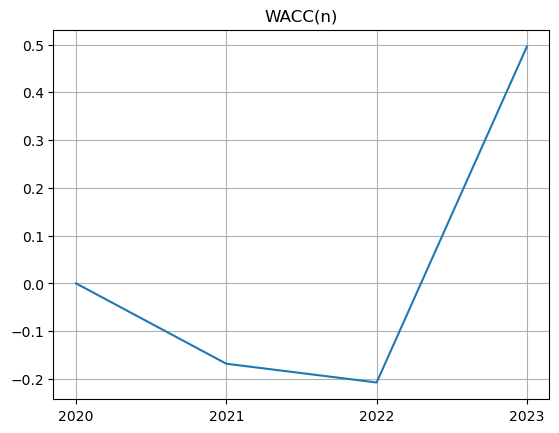

In [367]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator,MultipleLocator


def equation(wacc,n,f1):
    return (1-(1+wacc)**(-n))/wacc-f1
time = 2020

W, k_0, k_d, w_d , n, T = symbols('W, k_0, k_d, w_d, n, T')

f = (1-(1+k_0)**(-n))/(k_0*(1-w_d*T * (1-(1+k_d)**(-n))))

waccs = []
for i in databook.index:
    n_=i - time
    print(i,':',end='')
    f1 = f.subs({n:n_, k_0:databook.loc[:,'k_0'][i], k_d:databook.loc[:,'k_d'][i], w_d:databook.loc[:,'w_d'][i], T:databook.loc[:,'T'][i]})
    sols = [root.evalf() for root in solve((1-(1+W)**(-n_))/W-f1) if root.is_real and abs(root)<=1]
    waccs.extend(sols)
   
    if sols==[]:
        waccs.append(0)
        print(0)
    else:
        print(*sols)

fig, ax = plt.subplots()
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.plot(databook.index,waccs)
ax.grid()
plt.title('WACC(n)')
plt.show()

In [368]:
databook['WACC'] = waccs

In [369]:
databook.to_excel('OZON.xlsx')

In [372]:
c = dict()
for i in databook.index:
    c[i] = databook['CCF 1'][i]
    if i!=databook.index[0]:

        for n in range(databook.index[0]-i):
            c[i] *= (1+databook['WACC'][i+n+1])

print(sum(c.values())*1e6)

3159735371090.90
